In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/cifar10/sisa

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 252 (delta 4), reused 24 (delta 4), pack-reused 206 (from 1)
Receiving objects: 100% (252/252), 227.03 MiB | 18.74 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Updating files: 100% (65/65), done.
/kaggle/working/machine_unlearning_experiments/experiments/cifar10/sisa


## Dependencies

In [2]:
import sys
import json
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Init model
from models.resnet50 import init_model_resnet50

# Create sisa structure
from methods.sisa.sisa_utils import create_sisa_structure

# Recreate sisa dataloaders from json file
from methods.sisa.sisa_utils import recreate_sisa_dataloaders

# SISA train & test loop
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework

# Aggregate SISA models, via weighted voting
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure

Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 32

LEARNING_RATE = 0.001

EPOCHS = 5

SHARDS = 3

SLICES = 5

# SISA structure

## Get data transform

In [6]:
*_, transform = init_model_resnet50()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Init model...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s]


Done initializing model.
Model ID: 136875315538832, Optimizer ID: 136875286265616, Criterion ID: 136875286265712


## Load dataset

In [7]:
train_dataset = datasets.CIFAR10(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=data_root, train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [00:05<00:00, 29230143.08it/s]


Extracting /kaggle/working/machine_unlearning_experiments/data/cifar-10-python.tar.gz to /kaggle/working/machine_unlearning_experiments/data
Files already downloaded and verified


## Create SISA structure

In [8]:
create_sisa_structure(train_dataset, shards=SHARDS, slices_per_shard=SLICES)

SISA structure saved to sisa_structure.json


In [9]:
sisa_structure_file = 'sisa_structure.json'

## Prepare DataLoaders from json file

In [10]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

# Train using SISA framework

## Models output path

In [11]:
save_models_metrics_dir = './sisa_models'

## Call train

In [12]:
sisa_train(
    dataloaders=dataloaders, 
    num_epochs=EPOCHS, 
    save_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_resnet50,
    learning_rate=LEARNING_RATE,
    )

Training shard: shard_0
Init model...
Done initializing model.
Model ID: 136875315583424, Optimizer ID: 136875307450080, Criterion ID: 136875307450176
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.58it/s]


Epoch [1/5], Train Loss: 1.2652, Train Accuracy: 0.5667, Val Loss: 0.9913, Val Accuracy: 0.6426
Epoch 1: New best validation accuracy: 0.6426. Model saved to ./sisa_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.22it/s]


Epoch [2/5], Train Loss: 0.7732, Train Accuracy: 0.7400, Val Loss: 1.0361, Val Accuracy: 0.6727
Epoch 2: New best validation accuracy: 0.6727. Model saved to ./sisa_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.41it/s]


Epoch [3/5], Train Loss: 0.5554, Train Accuracy: 0.8123, Val Loss: 0.8659, Val Accuracy: 0.7147
Epoch 3: New best validation accuracy: 0.7147. Model saved to ./sisa_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.31it/s]


Epoch [4/5], Train Loss: 0.4133, Train Accuracy: 0.8577, Val Loss: 0.7829, Val Accuracy: 0.7327
Epoch 4: New best validation accuracy: 0.7327. Model saved to ./sisa_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.41it/s]


Epoch [5/5], Train Loss: 0.2375, Train Accuracy: 0.9203, Val Loss: 0.9744, Val Accuracy: 0.6967
Training complete for ./sisa_models/shard_0_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_0_slice_0_ResNet50_CIFAR10_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.38it/s]


Epoch [1/5], Train Loss: 0.7288, Train Accuracy: 0.7593, Val Loss: 0.6835, Val Accuracy: 0.7688
Epoch 1: New best validation accuracy: 0.7688. Model saved to ./sisa_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.28it/s]


Epoch [2/5], Train Loss: 0.3588, Train Accuracy: 0.8713, Val Loss: 0.6173, Val Accuracy: 0.8138
Epoch 2: New best validation accuracy: 0.8138. Model saved to ./sisa_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [3/5], Train Loss: 0.1730, Train Accuracy: 0.9443, Val Loss: 0.5995, Val Accuracy: 0.8288
Epoch 3: New best validation accuracy: 0.8288. Model saved to ./sisa_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]


Epoch [4/5], Train Loss: 0.1409, Train Accuracy: 0.9520, Val Loss: 0.7970, Val Accuracy: 0.7958


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.25it/s]


Epoch [5/5], Train Loss: 0.1269, Train Accuracy: 0.9563, Val Loss: 0.9262, Val Accuracy: 0.7477
Training complete for ./sisa_models/shard_0_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_0_slice_1_ResNet50_CIFAR10_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.08it/s]


Epoch [1/5], Train Loss: 0.7600, Train Accuracy: 0.7413, Val Loss: 0.7185, Val Accuracy: 0.7508
Epoch 1: New best validation accuracy: 0.7508. Model saved to ./sisa_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.38it/s]


Epoch [2/5], Train Loss: 0.2795, Train Accuracy: 0.9070, Val Loss: 0.6432, Val Accuracy: 0.7868
Epoch 2: New best validation accuracy: 0.7868. Model saved to ./sisa_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.45it/s]


Epoch [3/5], Train Loss: 0.1490, Train Accuracy: 0.9513, Val Loss: 0.5287, Val Accuracy: 0.8438
Epoch 3: New best validation accuracy: 0.8438. Model saved to ./sisa_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.36it/s]


Epoch [4/5], Train Loss: 0.0918, Train Accuracy: 0.9727, Val Loss: 0.7274, Val Accuracy: 0.8108


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.19it/s]


Epoch [5/5], Train Loss: 0.0943, Train Accuracy: 0.9680, Val Loss: 0.8627, Val Accuracy: 0.7658
Training complete for ./sisa_models/shard_0_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_0_slice_2_ResNet50_CIFAR10_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.47it/s]


Epoch [1/5], Train Loss: 0.7374, Train Accuracy: 0.7603, Val Loss: 0.6341, Val Accuracy: 0.7658
Epoch 1: New best validation accuracy: 0.7658. Model saved to ./sisa_models/shard_0_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.37it/s]


Epoch [2/5], Train Loss: 0.2718, Train Accuracy: 0.9103, Val Loss: 0.4699, Val Accuracy: 0.8498
Epoch 2: New best validation accuracy: 0.8498. Model saved to ./sisa_models/shard_0_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.44it/s]


Epoch [3/5], Train Loss: 0.1164, Train Accuracy: 0.9633, Val Loss: 0.5144, Val Accuracy: 0.8348


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.47it/s]


Epoch [4/5], Train Loss: 0.0494, Train Accuracy: 0.9830, Val Loss: 0.5521, Val Accuracy: 0.8288


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.39it/s]


Epoch [5/5], Train Loss: 0.0285, Train Accuracy: 0.9927, Val Loss: 0.5895, Val Accuracy: 0.8288
Training complete for ./sisa_models/shard_0_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_0_slice_3_ResNet50_CIFAR10_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.45it/s]


Epoch [1/5], Train Loss: 0.6720, Train Accuracy: 0.7771, Val Loss: 0.7376, Val Accuracy: 0.7387
Epoch 1: New best validation accuracy: 0.7387. Model saved to ./sisa_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]


Epoch [2/5], Train Loss: 0.2384, Train Accuracy: 0.9214, Val Loss: 0.5821, Val Accuracy: 0.8228
Epoch 2: New best validation accuracy: 0.8228. Model saved to ./sisa_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.31it/s]


Epoch [3/5], Train Loss: 0.0678, Train Accuracy: 0.9790, Val Loss: 0.5100, Val Accuracy: 0.8198


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.14it/s]


Epoch [4/5], Train Loss: 0.0292, Train Accuracy: 0.9930, Val Loss: 0.4893, Val Accuracy: 0.8769
Epoch 4: New best validation accuracy: 0.8769. Model saved to ./sisa_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [5/5], Train Loss: 0.0157, Train Accuracy: 0.9950, Val Loss: 0.5925, Val Accuracy: 0.8589
Training complete for ./sisa_models/shard_0_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_0_slice_4_ResNet50_CIFAR10_history.json'.
Saved final shard model to ./sisa_models/shard_0_final_model.pth
Training shard: shard_1
Init model...
Done initializing model.
Model ID: 136875286343264, Optimizer ID: 136875315534656, Criterion ID: 136875315543200
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.31it/s]


Epoch [1/5], Train Loss: 1.2809, Train Accuracy: 0.5680, Val Loss: 1.4226, Val Accuracy: 0.6006
Epoch 1: New best validation accuracy: 0.6006. Model saved to ./sisa_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [2/5], Train Loss: 0.8068, Train Accuracy: 0.7270, Val Loss: 0.8286, Val Accuracy: 0.7237
Epoch 2: New best validation accuracy: 0.7237. Model saved to ./sisa_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.05it/s]


Epoch [3/5], Train Loss: 0.5390, Train Accuracy: 0.8183, Val Loss: 1.0709, Val Accuracy: 0.6547


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00,  9.51it/s]


Epoch [4/5], Train Loss: 0.4020, Train Accuracy: 0.8567, Val Loss: 0.8936, Val Accuracy: 0.7237


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.36it/s]


Epoch [5/5], Train Loss: 0.2780, Train Accuracy: 0.9087, Val Loss: 0.7038, Val Accuracy: 0.7718
Epoch 5: New best validation accuracy: 0.7718. Model saved to ./sisa_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_models/shard_1_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_1_slice_0_ResNet50_CIFAR10_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.29it/s]


Epoch [1/5], Train Loss: 0.7713, Train Accuracy: 0.7470, Val Loss: 0.8073, Val Accuracy: 0.7357
Epoch 1: New best validation accuracy: 0.7357. Model saved to ./sisa_models/shard_1_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]


Epoch [2/5], Train Loss: 0.3719, Train Accuracy: 0.8767, Val Loss: 0.8512, Val Accuracy: 0.6967


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]


Epoch [3/5], Train Loss: 0.2055, Train Accuracy: 0.9327, Val Loss: 0.7555, Val Accuracy: 0.7538
Epoch 3: New best validation accuracy: 0.7538. Model saved to ./sisa_models/shard_1_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.29it/s]


Epoch [4/5], Train Loss: 0.1811, Train Accuracy: 0.9380, Val Loss: 0.9565, Val Accuracy: 0.7357


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [5/5], Train Loss: 0.1468, Train Accuracy: 0.9500, Val Loss: 0.8883, Val Accuracy: 0.7538
Training complete for ./sisa_models/shard_1_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_1_slice_1_ResNet50_CIFAR10_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.37it/s]


Epoch [1/5], Train Loss: 0.7248, Train Accuracy: 0.7647, Val Loss: 0.7749, Val Accuracy: 0.7177
Epoch 1: New best validation accuracy: 0.7177. Model saved to ./sisa_models/shard_1_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.23it/s]


Epoch [2/5], Train Loss: 0.2600, Train Accuracy: 0.9120, Val Loss: 0.6710, Val Accuracy: 0.7538
Epoch 2: New best validation accuracy: 0.7538. Model saved to ./sisa_models/shard_1_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.49it/s]


Epoch [3/5], Train Loss: 0.1309, Train Accuracy: 0.9577, Val Loss: 0.6305, Val Accuracy: 0.8168
Epoch 3: New best validation accuracy: 0.8168. Model saved to ./sisa_models/shard_1_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.36it/s]


Epoch [4/5], Train Loss: 0.1012, Train Accuracy: 0.9673, Val Loss: 0.6406, Val Accuracy: 0.8108


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [5/5], Train Loss: 0.0847, Train Accuracy: 0.9753, Val Loss: 0.7832, Val Accuracy: 0.7688
Training complete for ./sisa_models/shard_1_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_1_slice_2_ResNet50_CIFAR10_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.32it/s]


Epoch [1/5], Train Loss: 0.7006, Train Accuracy: 0.7683, Val Loss: 0.5926, Val Accuracy: 0.8288
Epoch 1: New best validation accuracy: 0.8288. Model saved to ./sisa_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.93it/s]


Epoch [2/5], Train Loss: 0.2387, Train Accuracy: 0.9213, Val Loss: 0.7289, Val Accuracy: 0.7838


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.42it/s]


Epoch [3/5], Train Loss: 0.0978, Train Accuracy: 0.9720, Val Loss: 0.4602, Val Accuracy: 0.8529
Epoch 3: New best validation accuracy: 0.8529. Model saved to ./sisa_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.15it/s]


Epoch [4/5], Train Loss: 0.0476, Train Accuracy: 0.9833, Val Loss: 0.5435, Val Accuracy: 0.8408


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]


Epoch [5/5], Train Loss: 0.0590, Train Accuracy: 0.9823, Val Loss: 0.7370, Val Accuracy: 0.8198
Training complete for ./sisa_models/shard_1_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_1_slice_3_ResNet50_CIFAR10_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.05it/s]


Epoch [1/5], Train Loss: 0.6913, Train Accuracy: 0.7831, Val Loss: 0.7540, Val Accuracy: 0.7508
Epoch 1: New best validation accuracy: 0.7508. Model saved to ./sisa_models/shard_1_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.36it/s]


Epoch [2/5], Train Loss: 0.2183, Train Accuracy: 0.9247, Val Loss: 0.6205, Val Accuracy: 0.8168
Epoch 2: New best validation accuracy: 0.8168. Model saved to ./sisa_models/shard_1_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.40it/s]


Epoch [3/5], Train Loss: 0.0904, Train Accuracy: 0.9733, Val Loss: 0.7661, Val Accuracy: 0.7808


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.44it/s]


Epoch [4/5], Train Loss: 0.0783, Train Accuracy: 0.9750, Val Loss: 0.8382, Val Accuracy: 0.7778


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.93it/s]


Epoch [5/5], Train Loss: 0.0320, Train Accuracy: 0.9920, Val Loss: 0.7478, Val Accuracy: 0.7988
Training complete for ./sisa_models/shard_1_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_1_slice_4_ResNet50_CIFAR10_history.json'.
Saved final shard model to ./sisa_models/shard_1_final_model.pth
Training shard: shard_2
Init model...
Done initializing model.
Model ID: 136878715378160, Optimizer ID: 136875307443888, Criterion ID: 136875307436688
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]


Epoch [1/5], Train Loss: 1.3182, Train Accuracy: 0.5530, Val Loss: 1.1992, Val Accuracy: 0.5886
Epoch 1: New best validation accuracy: 0.5886. Model saved to ./sisa_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.49it/s]


Epoch [2/5], Train Loss: 0.7987, Train Accuracy: 0.7367, Val Loss: 1.6475, Val Accuracy: 0.4955


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.35it/s]


Epoch [3/5], Train Loss: 0.5393, Train Accuracy: 0.8157, Val Loss: 0.9705, Val Accuracy: 0.7207
Epoch 3: New best validation accuracy: 0.7207. Model saved to ./sisa_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.28it/s]


Epoch [4/5], Train Loss: 0.3929, Train Accuracy: 0.8603, Val Loss: 0.9683, Val Accuracy: 0.6727


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.31it/s]


Epoch [5/5], Train Loss: 0.2878, Train Accuracy: 0.9017, Val Loss: 1.0028, Val Accuracy: 0.7387
Epoch 5: New best validation accuracy: 0.7387. Model saved to ./sisa_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_models/shard_2_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_2_slice_0_ResNet50_CIFAR10_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.36it/s]


Epoch [1/5], Train Loss: 0.7660, Train Accuracy: 0.7453, Val Loss: 0.6788, Val Accuracy: 0.7808
Epoch 1: New best validation accuracy: 0.7808. Model saved to ./sisa_models/shard_2_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.40it/s]


Epoch [2/5], Train Loss: 0.3967, Train Accuracy: 0.8677, Val Loss: 0.7919, Val Accuracy: 0.7688


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]


Epoch [3/5], Train Loss: 0.2033, Train Accuracy: 0.9343, Val Loss: 0.6733, Val Accuracy: 0.7868
Epoch 3: New best validation accuracy: 0.7868. Model saved to ./sisa_models/shard_2_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.25it/s]


Epoch [4/5], Train Loss: 0.1191, Train Accuracy: 0.9617, Val Loss: 1.4174, Val Accuracy: 0.6577


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]


Epoch [5/5], Train Loss: 0.1217, Train Accuracy: 0.9593, Val Loss: 1.0059, Val Accuracy: 0.7387
Training complete for ./sisa_models/shard_2_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_2_slice_1_ResNet50_CIFAR10_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.30it/s]


Epoch [1/5], Train Loss: 0.7121, Train Accuracy: 0.7537, Val Loss: 0.5754, Val Accuracy: 0.8048
Epoch 1: New best validation accuracy: 0.8048. Model saved to ./sisa_models/shard_2_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00,  9.32it/s]


Epoch [2/5], Train Loss: 0.2846, Train Accuracy: 0.9030, Val Loss: 0.6577, Val Accuracy: 0.7628


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.92it/s]


Epoch [3/5], Train Loss: 0.1268, Train Accuracy: 0.9593, Val Loss: 0.6023, Val Accuracy: 0.7988


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.41it/s]


Epoch [4/5], Train Loss: 0.0776, Train Accuracy: 0.9777, Val Loss: 0.6694, Val Accuracy: 0.8018


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]


Epoch [5/5], Train Loss: 0.0565, Train Accuracy: 0.9827, Val Loss: 0.6429, Val Accuracy: 0.8288
Epoch 5: New best validation accuracy: 0.8288. Model saved to ./sisa_models/shard_2_slice_2_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_models/shard_2_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_2_slice_2_ResNet50_CIFAR10_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.44it/s]


Epoch [1/5], Train Loss: 0.7586, Train Accuracy: 0.7567, Val Loss: 0.6115, Val Accuracy: 0.7598
Epoch 1: New best validation accuracy: 0.7598. Model saved to ./sisa_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


Epoch [2/5], Train Loss: 0.2761, Train Accuracy: 0.9097, Val Loss: 0.9496, Val Accuracy: 0.6727


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00, 10.98it/s]


Epoch [3/5], Train Loss: 0.1170, Train Accuracy: 0.9620, Val Loss: 0.7167, Val Accuracy: 0.7688
Epoch 3: New best validation accuracy: 0.7688. Model saved to ./sisa_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.27it/s]


Epoch [4/5], Train Loss: 0.0608, Train Accuracy: 0.9813, Val Loss: 0.5518, Val Accuracy: 0.8138
Epoch 4: New best validation accuracy: 0.8138. Model saved to ./sisa_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]


Epoch [5/5], Train Loss: 0.0469, Train Accuracy: 0.9863, Val Loss: 0.5229, Val Accuracy: 0.8288
Epoch 5: New best validation accuracy: 0.8288. Model saved to ./sisa_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_models/shard_2_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_2_slice_3_ResNet50_CIFAR10_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.32it/s]


Epoch [1/5], Train Loss: 0.6928, Train Accuracy: 0.7659, Val Loss: 0.8495, Val Accuracy: 0.7177
Epoch 1: New best validation accuracy: 0.7177. Model saved to ./sisa_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:01<00:00,  9.91it/s]


Epoch [2/5], Train Loss: 0.2258, Train Accuracy: 0.9284, Val Loss: 0.6804, Val Accuracy: 0.7928
Epoch 2: New best validation accuracy: 0.7928. Model saved to ./sisa_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.29it/s]


Epoch [3/5], Train Loss: 0.0942, Train Accuracy: 0.9704, Val Loss: 0.6343, Val Accuracy: 0.8408
Epoch 3: New best validation accuracy: 0.8408. Model saved to ./sisa_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.26it/s]


Epoch [4/5], Train Loss: 0.0427, Train Accuracy: 0.9880, Val Loss: 0.8516, Val Accuracy: 0.7808


Evaluating on validation set...: 100%|██████████| 11/11 [00:00<00:00, 11.28it/s]

Epoch [5/5], Train Loss: 0.0445, Train Accuracy: 0.9867, Val Loss: 0.7017, Val Accuracy: 0.8108
Training complete for ./sisa_models/shard_2_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_models/shard_2_slice_4_ResNet50_CIFAR10_history.json'.
Saved final shard model to ./sisa_models/shard_2_final_model.pth


## Call test

In [13]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_resnet50,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 136875315461856, Optimizer ID: 136875286263648, Criterion ID: 136875286257696
Loading and testing model: ./sisa_models/shard_0_ResNet50_CIFAR10


Evaluating model: ./sisa_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:29<00:00, 10.71it/s]


Predictions and labels saved to ./sisa_models/shard_0_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 136875286340816, Optimizer ID: 136875286259616, Criterion ID: 136875286252320
Loading and testing model: ./sisa_models/shard_1_ResNet50_CIFAR10


Evaluating model: ./sisa_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:28<00:00, 10.89it/s]


Predictions and labels saved to ./sisa_models/shard_1_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 136875307541232, Optimizer ID: 136875315543536, Criterion ID: 136875315543200
Loading and testing model: ./sisa_models/shard_2_ResNet50_CIFAR10


Evaluating model: ./sisa_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:29<00:00, 10.78it/s]

Predictions and labels saved to ./sisa_models/shard_2_ResNet50_CIFAR10_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [14]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.8238
  Precision: 0.8377
  Recall: 0.8238
  F1 Score: 0.8236
Shard shard_1 Metrics:
  Accuracy: 0.8364
  Precision: 0.8446
  Recall: 0.8364
  F1 Score: 0.8367
Shard shard_2 Metrics:
  Accuracy: 0.8092
  Precision: 0.8166
  Recall: 0.8092
  F1 Score: 0.8077

Aggregated Model Metrics:
  Accuracy: 0.8700
  Precision: 0.8731
  Recall: 0.8700
  F1 Score: 0.8703


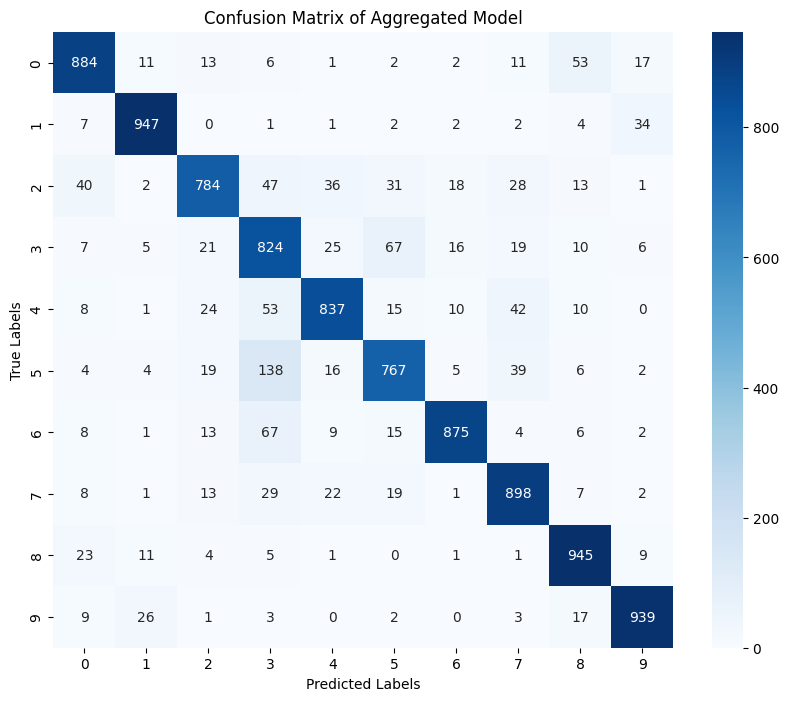

In [15]:
evaluate_aggregated_model(results)

# SISA re-train

## Paths to data info

In [22]:
samples_to_delete = project_root/'experiments/cifar10/naive/cifar10_samples_to_unlearn.json'
sisa_structure = 'sisa_structure.json'
updated_sisa_structure = 'updated_sisa_strucute.json'
deleted_samples = 'deleted_samples.json'

## Update sisa structure -> delete samples 

In [23]:
affected_shards = update_sisa_structure(samples_to_delete, sisa_structure, updated_sisa_structure,deleted_samples)

Retraining Plan:
  Shard: shard_0, Start from Slice: slice_0 onward
  Shard: shard_1, Start from Slice: slice_0 onward
  Shard: shard_2, Start from Slice: slice_0 onward


## Recreate DataLoaders from json file

In [24]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

## Models output path

In [25]:
save_path = "./sisa_updated_models"

## Retrain the affected shards

In [26]:
retrain_sisa_framework(
    dataloaders=dataloaders,
    affected_shards=affected_shards,
    num_epochs=EPOCHS,
    save_models_metrics_dir=save_path,
    init_model_func=init_model_resnet50, 
    learning_rate=LEARNING_RATE
)

Retraining shard: shard_0
Init model...
Done initializing model.
Model ID: 136875293510816, Optimizer ID: 136875290568464, Criterion ID: 136875290570960
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.64it/s]


Epoch [1/5], Train Loss: 1.3247, Train Accuracy: 0.5380, Val Loss: 1.3310, Val Accuracy: 0.5753
Epoch 1: New best validation accuracy: 0.5753. Model saved to ./sisa_updated_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch [2/5], Train Loss: 0.8282, Train Accuracy: 0.7269, Val Loss: 0.9568, Val Accuracy: 0.6722
Epoch 2: New best validation accuracy: 0.6722. Model saved to ./sisa_updated_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:01<00:00,  9.94it/s]


Epoch [3/5], Train Loss: 0.5667, Train Accuracy: 0.8081, Val Loss: 0.7199, Val Accuracy: 0.7458
Epoch 3: New best validation accuracy: 0.7458. Model saved to ./sisa_updated_models/shard_0_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch [4/5], Train Loss: 0.3745, Train Accuracy: 0.8740, Val Loss: 0.8696, Val Accuracy: 0.7057


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.60it/s]


Epoch [5/5], Train Loss: 0.2713, Train Accuracy: 0.9100, Val Loss: 0.8504, Val Accuracy: 0.7425
Training complete for ./sisa_updated_models/shard_0_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_0_slice_0_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch [1/5], Train Loss: 0.7602, Train Accuracy: 0.7468, Val Loss: 0.8821, Val Accuracy: 0.7300
Epoch 1: New best validation accuracy: 0.7300. Model saved to ./sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch [2/5], Train Loss: 0.3880, Train Accuracy: 0.8630, Val Loss: 0.7054, Val Accuracy: 0.7667
Epoch 2: New best validation accuracy: 0.7667. Model saved to ./sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch [3/5], Train Loss: 0.1902, Train Accuracy: 0.9400, Val Loss: 0.7233, Val Accuracy: 0.7933
Epoch 3: New best validation accuracy: 0.7933. Model saved to ./sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch [4/5], Train Loss: 0.1467, Train Accuracy: 0.9545, Val Loss: 0.6530, Val Accuracy: 0.8067
Epoch 4: New best validation accuracy: 0.8067. Model saved to ./sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch [5/5], Train Loss: 0.1271, Train Accuracy: 0.9637, Val Loss: 0.8539, Val Accuracy: 0.7467
Training complete for ./sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_0_slice_1_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 10/10 [00:01<00:00,  9.15it/s]


Epoch [1/5], Train Loss: 0.7825, Train Accuracy: 0.7435, Val Loss: 0.7968, Val Accuracy: 0.7433
Epoch 1: New best validation accuracy: 0.7433. Model saved to ./sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [2/5], Train Loss: 0.2626, Train Accuracy: 0.9119, Val Loss: 0.8166, Val Accuracy: 0.7567
Epoch 2: New best validation accuracy: 0.7567. Model saved to ./sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch [3/5], Train Loss: 0.1018, Train Accuracy: 0.9722, Val Loss: 0.7411, Val Accuracy: 0.7900
Epoch 3: New best validation accuracy: 0.7900. Model saved to ./sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch [4/5], Train Loss: 0.1111, Train Accuracy: 0.9648, Val Loss: 0.7252, Val Accuracy: 0.8233
Epoch 4: New best validation accuracy: 0.8233. Model saved to ./sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch [5/5], Train Loss: 0.1034, Train Accuracy: 0.9660, Val Loss: 0.8275, Val Accuracy: 0.7867
Training complete for ./sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_0_slice_2_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch [1/5], Train Loss: 0.7054, Train Accuracy: 0.7619, Val Loss: 0.6917, Val Accuracy: 0.7682
Epoch 1: New best validation accuracy: 0.7682. Model saved to ./sisa_updated_models/shard_0_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch [2/5], Train Loss: 0.3338, Train Accuracy: 0.8853, Val Loss: 0.6697, Val Accuracy: 0.7848
Epoch 2: New best validation accuracy: 0.7848. Model saved to ./sisa_updated_models/shard_0_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch [3/5], Train Loss: 0.1990, Train Accuracy: 0.9350, Val Loss: 0.6211, Val Accuracy: 0.8344
Epoch 3: New best validation accuracy: 0.8344. Model saved to ./sisa_updated_models/shard_0_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 10.35it/s]


Epoch [4/5], Train Loss: 0.1539, Train Accuracy: 0.9460, Val Loss: 0.5887, Val Accuracy: 0.8179


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch [5/5], Train Loss: 0.1738, Train Accuracy: 0.9412, Val Loss: 0.9543, Val Accuracy: 0.7682
Training complete for ./sisa_updated_models/shard_0_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_0_slice_3_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch [1/5], Train Loss: 0.7166, Train Accuracy: 0.7611, Val Loss: 0.5326, Val Accuracy: 0.8140
Epoch 1: New best validation accuracy: 0.8140. Model saved to ./sisa_updated_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch [2/5], Train Loss: 0.1791, Train Accuracy: 0.9421, Val Loss: 0.6018, Val Accuracy: 0.8206
Epoch 2: New best validation accuracy: 0.8206. Model saved to ./sisa_updated_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch [3/5], Train Loss: 0.0408, Train Accuracy: 0.9897, Val Loss: 0.5698, Val Accuracy: 0.8206


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch [4/5], Train Loss: 0.0306, Train Accuracy: 0.9923, Val Loss: 0.6174, Val Accuracy: 0.8272
Epoch 4: New best validation accuracy: 0.8272. Model saved to ./sisa_updated_models/shard_0_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [5/5], Train Loss: 0.0185, Train Accuracy: 0.9952, Val Loss: 0.7102, Val Accuracy: 0.8173
Training complete for ./sisa_updated_models/shard_0_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_0_slice_4_ResNet50_CIFAR10_history.json'.
Saved updated model for shard_0 to ./sisa_updated_models/shard_0_final_model.pth
Retraining shard: shard_1
Init model...
Done initializing model.
Model ID: 136875286262928, Optimizer ID: 136875290444128, Criterion ID: 136875290449792
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch [1/5], Train Loss: 1.3105, Train Accuracy: 0.5508, Val Loss: 1.6483, Val Accuracy: 0.5150
Epoch 1: New best validation accuracy: 0.5150. Model saved to ./sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch [2/5], Train Loss: 0.7747, Train Accuracy: 0.7340, Val Loss: 0.9127, Val Accuracy: 0.6777
Epoch 2: New best validation accuracy: 0.6777. Model saved to ./sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch [3/5], Train Loss: 0.5364, Train Accuracy: 0.8158, Val Loss: 1.1336, Val Accuracy: 0.6811
Epoch 3: New best validation accuracy: 0.6811. Model saved to ./sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [4/5], Train Loss: 0.3419, Train Accuracy: 0.8825, Val Loss: 0.9466, Val Accuracy: 0.7342
Epoch 4: New best validation accuracy: 0.7342. Model saved to ./sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch [5/5], Train Loss: 0.2333, Train Accuracy: 0.9234, Val Loss: 0.9098, Val Accuracy: 0.7110
Training complete for ./sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_1_slice_0_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch [1/5], Train Loss: 0.8416, Train Accuracy: 0.7138, Val Loss: 0.5918, Val Accuracy: 0.7793
Epoch 1: New best validation accuracy: 0.7793. Model saved to ./sisa_updated_models/shard_1_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [2/5], Train Loss: 0.4077, Train Accuracy: 0.8645, Val Loss: 0.5626, Val Accuracy: 0.8094
Epoch 2: New best validation accuracy: 0.8094. Model saved to ./sisa_updated_models/shard_1_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


Epoch [3/5], Train Loss: 0.2795, Train Accuracy: 0.9031, Val Loss: 0.7226, Val Accuracy: 0.7625


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch [4/5], Train Loss: 0.1909, Train Accuracy: 0.9395, Val Loss: 0.6962, Val Accuracy: 0.7993


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch [5/5], Train Loss: 0.1149, Train Accuracy: 0.9625, Val Loss: 0.8712, Val Accuracy: 0.7592
Training complete for ./sisa_updated_models/shard_1_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_1_slice_1_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [1/5], Train Loss: 0.7768, Train Accuracy: 0.7427, Val Loss: 0.7026, Val Accuracy: 0.7576
Epoch 1: New best validation accuracy: 0.7576. Model saved to ./sisa_updated_models/shard_1_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.66it/s]


Epoch [2/5], Train Loss: 0.3047, Train Accuracy: 0.9031, Val Loss: 0.6398, Val Accuracy: 0.7980
Epoch 2: New best validation accuracy: 0.7980. Model saved to ./sisa_updated_models/shard_1_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch [3/5], Train Loss: 0.1205, Train Accuracy: 0.9585, Val Loss: 0.8037, Val Accuracy: 0.7845


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.74it/s]


Epoch [4/5], Train Loss: 0.0836, Train Accuracy: 0.9701, Val Loss: 0.8811, Val Accuracy: 0.7643


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


Epoch [5/5], Train Loss: 0.0835, Train Accuracy: 0.9697, Val Loss: 0.8014, Val Accuracy: 0.7542
Training complete for ./sisa_updated_models/shard_1_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_1_slice_2_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [1/5], Train Loss: 0.7038, Train Accuracy: 0.7691, Val Loss: 0.7496, Val Accuracy: 0.7567
Epoch 1: New best validation accuracy: 0.7567. Model saved to ./sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [2/5], Train Loss: 0.2704, Train Accuracy: 0.9106, Val Loss: 0.4916, Val Accuracy: 0.8333
Epoch 2: New best validation accuracy: 0.8333. Model saved to ./sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch [3/5], Train Loss: 0.0758, Train Accuracy: 0.9775, Val Loss: 0.5550, Val Accuracy: 0.8367
Epoch 3: New best validation accuracy: 0.8367. Model saved to ./sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch [4/5], Train Loss: 0.0402, Train Accuracy: 0.9889, Val Loss: 0.6613, Val Accuracy: 0.8200


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [5/5], Train Loss: 0.0364, Train Accuracy: 0.9900, Val Loss: 0.6173, Val Accuracy: 0.8400
Epoch 5: New best validation accuracy: 0.8400. Model saved to ./sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_1_slice_3_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch [1/5], Train Loss: 0.7497, Train Accuracy: 0.7541, Val Loss: 0.6345, Val Accuracy: 0.7860
Epoch 1: New best validation accuracy: 0.7860. Model saved to ./sisa_updated_models/shard_1_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.56it/s]


Epoch [2/5], Train Loss: 0.2508, Train Accuracy: 0.9162, Val Loss: 0.5327, Val Accuracy: 0.8227
Epoch 2: New best validation accuracy: 0.8227. Model saved to ./sisa_updated_models/shard_1_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.58it/s]


Epoch [3/5], Train Loss: 0.0931, Train Accuracy: 0.9726, Val Loss: 0.5153, Val Accuracy: 0.8161


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [4/5], Train Loss: 0.0417, Train Accuracy: 0.9878, Val Loss: 0.6482, Val Accuracy: 0.8194


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch [5/5], Train Loss: 0.0893, Train Accuracy: 0.9722, Val Loss: 0.6561, Val Accuracy: 0.7893
Training complete for ./sisa_updated_models/shard_1_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_1_slice_4_ResNet50_CIFAR10_history.json'.
Saved updated model for shard_1 to ./sisa_updated_models/shard_1_final_model.pth
Retraining shard: shard_2
Init model...
Done initializing model.
Model ID: 136875288801872, Optimizer ID: 136875290564000, Criterion ID: 136875290561552
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


Epoch [1/5], Train Loss: 1.3384, Train Accuracy: 0.5459, Val Loss: 1.3791, Val Accuracy: 0.5118
Epoch 1: New best validation accuracy: 0.5118. Model saved to ./sisa_updated_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.58it/s]


Epoch [2/5], Train Loss: 0.8229, Train Accuracy: 0.7250, Val Loss: 0.9344, Val Accuracy: 0.6734
Epoch 2: New best validation accuracy: 0.6734. Model saved to ./sisa_updated_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch [3/5], Train Loss: 0.5656, Train Accuracy: 0.8127, Val Loss: 1.0470, Val Accuracy: 0.6936
Epoch 3: New best validation accuracy: 0.6936. Model saved to ./sisa_updated_models/shard_2_slice_0_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch [4/5], Train Loss: 0.3907, Train Accuracy: 0.8619, Val Loss: 1.0911, Val Accuracy: 0.6700


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch [5/5], Train Loss: 0.2772, Train Accuracy: 0.9041, Val Loss: 1.0551, Val Accuracy: 0.6869
Training complete for ./sisa_updated_models/shard_2_slice_0_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_2_slice_0_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.69it/s]


Epoch [1/5], Train Loss: 0.7993, Train Accuracy: 0.7253, Val Loss: 0.7562, Val Accuracy: 0.7609
Epoch 1: New best validation accuracy: 0.7609. Model saved to ./sisa_updated_models/shard_2_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch [2/5], Train Loss: 0.4021, Train Accuracy: 0.8574, Val Loss: 0.7588, Val Accuracy: 0.7643
Epoch 2: New best validation accuracy: 0.7643. Model saved to ./sisa_updated_models/shard_2_slice_1_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.64it/s]


Epoch [3/5], Train Loss: 0.1985, Train Accuracy: 0.9332, Val Loss: 0.9935, Val Accuracy: 0.7071


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.78it/s]


Epoch [4/5], Train Loss: 0.1703, Train Accuracy: 0.9384, Val Loss: 0.8842, Val Accuracy: 0.7407


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


Epoch [5/5], Train Loss: 0.1141, Train Accuracy: 0.9619, Val Loss: 0.9503, Val Accuracy: 0.7407
Training complete for ./sisa_updated_models/shard_2_slice_1_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_2_slice_1_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch [1/5], Train Loss: 0.7648, Train Accuracy: 0.7426, Val Loss: 0.6563, Val Accuracy: 0.7667
Epoch 1: New best validation accuracy: 0.7667. Model saved to ./sisa_updated_models/shard_2_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch [2/5], Train Loss: 0.2863, Train Accuracy: 0.8999, Val Loss: 0.6270, Val Accuracy: 0.8067
Epoch 2: New best validation accuracy: 0.8067. Model saved to ./sisa_updated_models/shard_2_slice_2_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch [3/5], Train Loss: 0.1593, Train Accuracy: 0.9446, Val Loss: 0.6418, Val Accuracy: 0.8067


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch [4/5], Train Loss: 0.0992, Train Accuracy: 0.9657, Val Loss: 0.7562, Val Accuracy: 0.7767


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 10.45it/s]


Epoch [5/5], Train Loss: 0.0821, Train Accuracy: 0.9753, Val Loss: 0.7163, Val Accuracy: 0.8300
Epoch 5: New best validation accuracy: 0.8300. Model saved to ./sisa_updated_models/shard_2_slice_2_ResNet50_CIFAR10_model.pth.
Training complete for ./sisa_updated_models/shard_2_slice_2_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_2_slice_2_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch [1/5], Train Loss: 0.7175, Train Accuracy: 0.7644, Val Loss: 0.8302, Val Accuracy: 0.7333
Epoch 1: New best validation accuracy: 0.7333. Model saved to ./sisa_updated_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.56it/s]


Epoch [2/5], Train Loss: 0.2553, Train Accuracy: 0.9184, Val Loss: 0.8273, Val Accuracy: 0.7733
Epoch 2: New best validation accuracy: 0.7733. Model saved to ./sisa_updated_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]


Epoch [3/5], Train Loss: 0.0947, Train Accuracy: 0.9723, Val Loss: 0.6995, Val Accuracy: 0.8200
Epoch 3: New best validation accuracy: 0.8200. Model saved to ./sisa_updated_models/shard_2_slice_3_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch [4/5], Train Loss: 0.0502, Train Accuracy: 0.9830, Val Loss: 0.9528, Val Accuracy: 0.7600


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch [5/5], Train Loss: 0.0606, Train Accuracy: 0.9826, Val Loss: 0.7410, Val Accuracy: 0.8200
Training complete for ./sisa_updated_models/shard_2_slice_3_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_2_slice_3_ResNet50_CIFAR10_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch [1/5], Train Loss: 0.7216, Train Accuracy: 0.7670, Val Loss: 0.8496, Val Accuracy: 0.6910
Epoch 1: New best validation accuracy: 0.6910. Model saved to ./sisa_updated_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch [2/5], Train Loss: 0.2500, Train Accuracy: 0.9108, Val Loss: 0.6032, Val Accuracy: 0.8040
Epoch 2: New best validation accuracy: 0.8040. Model saved to ./sisa_updated_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.52it/s]


Epoch [3/5], Train Loss: 0.0996, Train Accuracy: 0.9701, Val Loss: 0.5105, Val Accuracy: 0.8505
Epoch 3: New best validation accuracy: 0.8505. Model saved to ./sisa_updated_models/shard_2_slice_4_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch [4/5], Train Loss: 0.0469, Train Accuracy: 0.9864, Val Loss: 0.5616, Val Accuracy: 0.8405


Evaluating on validation set...: 100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch [5/5], Train Loss: 0.0253, Train Accuracy: 0.9948, Val Loss: 0.4996, Val Accuracy: 0.8472
Training complete for ./sisa_updated_models/shard_2_slice_4_ResNet50_CIFAR10. Training stats saved to './sisa_updated_models/shard_2_slice_4_ResNet50_CIFAR10_history.json'.
Saved updated model for shard_2 to ./sisa_updated_models/shard_2_final_model.pth


## Re-test new SISA models

In [27]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_path, 
    init_model_func=init_model_resnet50,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 136875290492016, Optimizer ID: 136875290671760, Criterion ID: 136875290671520
Loading and testing model: ./sisa_updated_models/shard_0_ResNet50_CIFAR10


Evaluating model: ./sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:29<00:00, 10.71it/s]


Predictions and labels saved to ./sisa_updated_models/shard_0_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 136875315581648, Optimizer ID: 136875286263696, Criterion ID: 136875286249632
Loading and testing model: ./sisa_updated_models/shard_1_ResNet50_CIFAR10


Evaluating model: ./sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:28<00:00, 10.81it/s]


Predictions and labels saved to ./sisa_updated_models/shard_1_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 136875290462192, Optimizer ID: 136875308269632, Criterion ID: 136875308270784
Loading and testing model: ./sisa_updated_models/shard_2_ResNet50_CIFAR10


Evaluating model: ./sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:29<00:00, 10.72it/s]


Predictions and labels saved to ./sisa_updated_models/shard_2_ResNet50_CIFAR10_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [28]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.8293
  Precision: 0.8317
  Recall: 0.8293
  F1 Score: 0.8290
Shard shard_1 Metrics:
  Accuracy: 0.8024
  Precision: 0.8076
  Recall: 0.8024
  F1 Score: 0.8006
Shard shard_2 Metrics:
  Accuracy: 0.8262
  Precision: 0.8320
  Recall: 0.8262
  F1 Score: 0.8249

Aggregated Model Metrics:
  Accuracy: 0.8582
  Precision: 0.8584
  Recall: 0.8582
  F1 Score: 0.8575


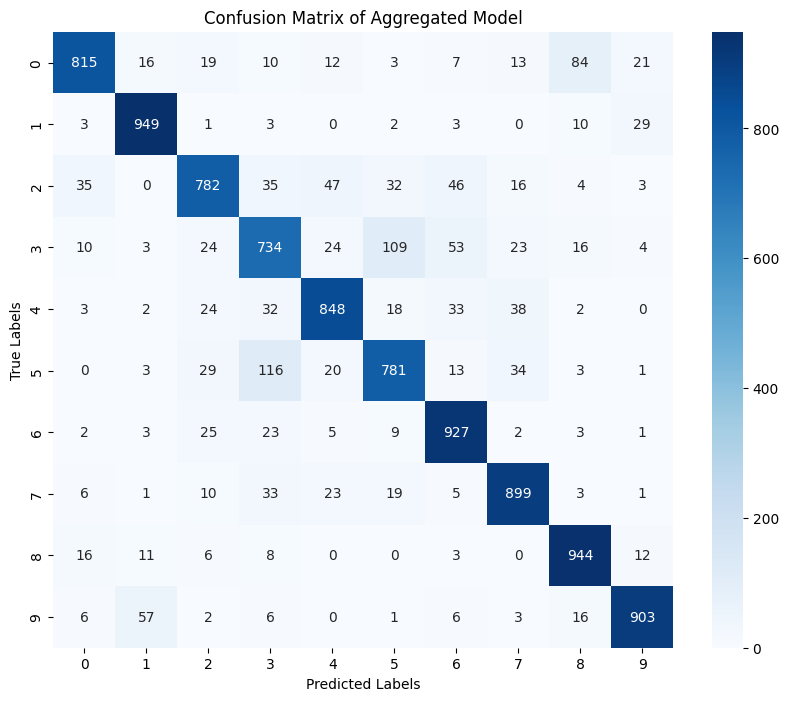

In [29]:
evaluate_aggregated_model(results)